In [105]:
"""
This script performs classification using machine learning models on a given dataset.

Libraries:
- pandas: Data manipulation and analysis
- matplotlib.pyplot: Plotting library for data visualization
- seaborn: Statistical data visualization
- sklearn.model_selection: Splitting dataset into training and testing sets
- sklearn.neural_network: Multi-layer Perceptron classifier
- sklearn.tree: Decision tree classifier
- sklearn.ensemble: Random Forest classifier
- sklearn.metrics: Evaluation metrics for model performance
- sklearn.preprocessing: StandardScaler for feature scaling, LabelEncoder for label encoding
- numpy: Numerical operations on arrays
- matplotlib.ticker: Customize plot tick locators
"""

# Importing necessary libraries
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # Plotting library for data visualization
import seaborn as sns  # Statistical data visualization
from sklearn.model_selection import train_test_split  # Splitting dataset into training and testing sets
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron classifier
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.metrics import accuracy_score, classification_report  # Evaluation metrics for model performance
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Feature scaling and label encoding
import numpy as np  # Numerical operations on arrays
from matplotlib.ticker import MultipleLocator  # Customize plot tick locators


In [106]:
"""
Loading datasets for analysis.

Variables:
- flight_df: DataFrame for flight dataset
- df1: DataFrame for training set of passenger dataset
- df2: DataFrame for testing set of passenger dataset

 CSV files ('flight_dataset.csv', 'passenger_train_dataset.csv', 'passenger_test_dataset.csv') should be in the working directory.
"""

# Loading the datasets
flight_df = pd.read_csv('flight_dataset.csv')
df1 = pd.read_csv('passenger_train_dataset.csv')
df2 = pd.read_csv('passenger_test_dataset.csv')


In [107]:
# joining test and train dataset to make it larger for passenger dataset
passenger_df = pd.concat([df1, df2], ignore_index=True)  # DataFrame containing both training and testing data for passengers

In [100]:
# Displaying the shape of the 'flight_df' DataFrame
flight_df.shape


(98619, 15)

In [101]:
# Displaying the shape of the 'df1' DataFrame (training set of passenger dataset)
df1.shape


(103904, 25)

In [108]:
# Displaying the shape of the 'df2' DataFrame (testing set of passenger dataset)
df2.shape


(25976, 25)

In [109]:
# Displaying the shape of the 'passenger_df' DataFrame (combined dataset for passengers)
passenger_df.shape


(129880, 25)

In [110]:
# Data Exploration: Displaying summary statistics of the 'passenger_df' DataFrame
print(passenger_df.describe())


          Unnamed: 0             id            Age  Flight Distance  \
count  129880.000000  129880.000000  129880.000000    129880.000000   
mean    44158.700000   64940.500000      39.427957      1190.316392   
std     31207.377062   37493.270818      15.119360       997.452477   
min         0.000000       1.000000       7.000000        31.000000   
25%     16234.750000   32470.750000      27.000000       414.000000   
50%     38963.500000   64940.500000      40.000000       844.000000   
75%     71433.250000   97410.250000      51.000000      1744.000000   
max    103903.000000  129880.000000      85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          129880.000000                      129880.000000   
mean                2.728696                           3.057599   
std                 1.329340                           1.526741   
min                 0.000000                           0.000000   
25%                 2.000

In [111]:
# Removing unnecessary columns (i.e., 'Unnamed: 0' and 'id') from the 'passenger_df' DataFrame
passenger_df = passenger_df.drop('Unnamed: 0', axis=1)
passenger_df = passenger_df.drop('id', axis=1)
passenger_df.head()


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [112]:
# Displaying the count of missing values in each column of the 'passenger_df' DataFrame
print(passenger_df.isnull().sum())


Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64


In [113]:
# Filling missing values with 0 since only 1 value is not null
passenger_df.fillna(0, inplace=True)

# Checking again for null values in the 'passenger_df' DataFrame
passenger_df.isnull().sum()


Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [114]:
# Displaying summary statistics of the 'flight_df' DataFrame
print(flight_df.describe())

# Cleaning the dataset by removing rows with missing values
flight_df.dropna(inplace=True)
flight_df.head()


                Age
count  98619.000000
mean      45.504021
std       25.929849
min        1.000000
25%       23.000000
50%       46.000000
75%       68.000000
max       90.000000


,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


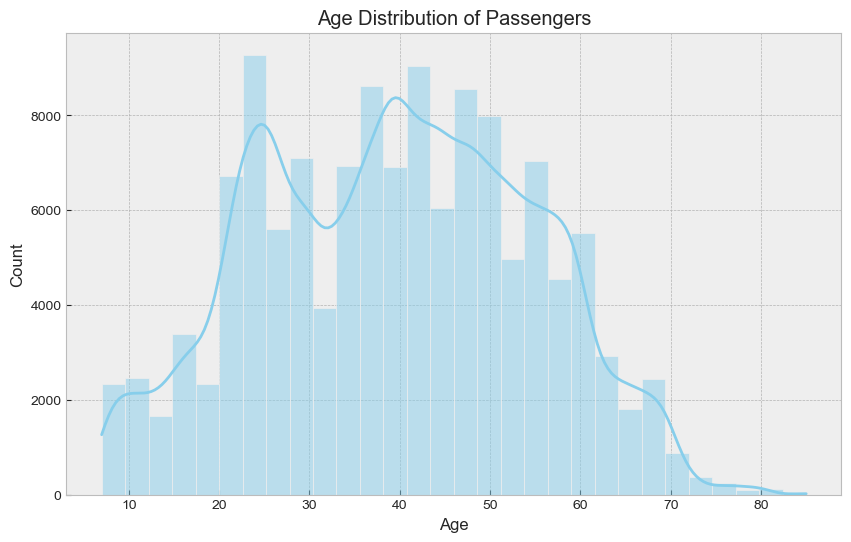

In [115]:
# Data visualization of passenger dataset

# Age distribution of flight data
plt.figure(figsize=(10, 6))
sns.histplot(passenger_df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [47]:
numeric_df=passenger_df._get_numeric_data()


In [116]:
def generate_colors(num):
    """
    Generate random hexadecimal color codes.

    Parameters:
    - num: Number of colors to generate

    Returns:
    - Single color code if num is 1, otherwise a list of color codes
    """
    if num == 1:
        colors = ''
        lst = list('ABCDEF0123456789')
        for i in range(num):
            colors = '#' + ''.join(np.random.choice(lst, 6))
    else:
        colors = []
        lst = list('ABCDEF0123456789')

        for i in range(num):
            colors.append('#' + ''.join(np.random.choice(lst, 6)))

    return colors


In [117]:
# Setting the seaborn style to 'ticks'
sns.set_style('ticks')

# Creating a figure with a specified size and dpi
fig = plt.figure(figsize=(25, 36), dpi=300)

# Plotting boxplots for each numerical column in the 'passenger_df' DataFrame
for i, column_name in enumerate(numeric_df):
    plt.subplot(9, 2, i + 1)
    ax = sns.boxplot(x=column_name, data=passenger_df, color=generate_colors(1))
    ax.set_title(column_name, size=15)
    plt.xlabel('')

# Adjusting subplot layout
plt.subplots_adjust(hspace=0.8, wspace=0.3)
fig.suptitle("Distribution of Numerical Columns (Box Plot)", size=20, fontweight='bold', y=0.92)

# Displaying the plot
plt.show()


In [118]:
# Calculating and displaying the distribution of genders in the 'passenger_df' DataFrame
Gender_percentage = dict((passenger_df['Gender'].value_counts() / passenger_df.shape[0]) * 100)
print('Distribution of Genders:\n')
print('Females: {:.2f}%  \nMales: {:.2f}% '.format(Gender_percentage['Female'], Gender_percentage['Male']))


Distribution of Genders:

Females: 50.74%  
Males: 49.26% 


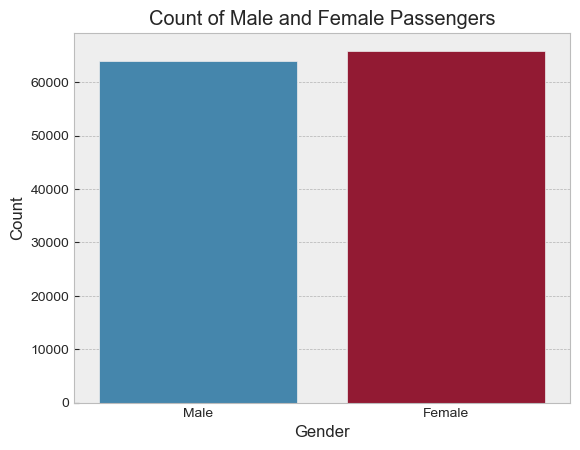

In [81]:
# Countplot for the distribution of genders in the 'passenger_df' DataFrame
sns.countplot(x='Gender', data=passenger_df)
plt.title('Count of Male and Female Passengers')  # Setting the plot title
plt.xlabel('Gender')  # Labeling the x-axis
plt.ylabel('Count')  # Labeling the y-axis
plt.show()  # Displaying the plot


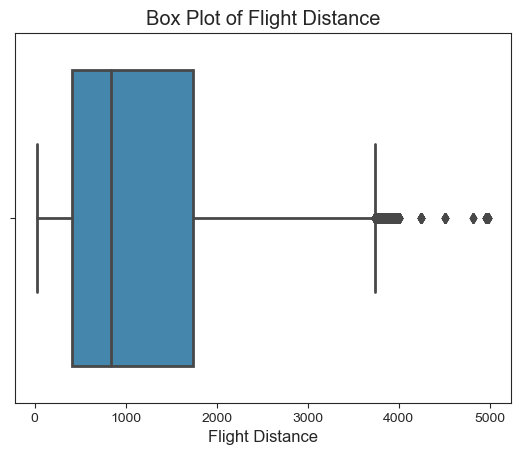

In [119]:
# Box Plot for Flight Distance in the 'passenger_df' DataFrame
sns.boxplot(x='Flight Distance', data=passenger_df)
plt.title('Box Plot of Flight Distance')  # Setting the plot title
plt.xlabel('Flight Distance')  # Labeling the x-axis
plt.show()  # Displaying the plot


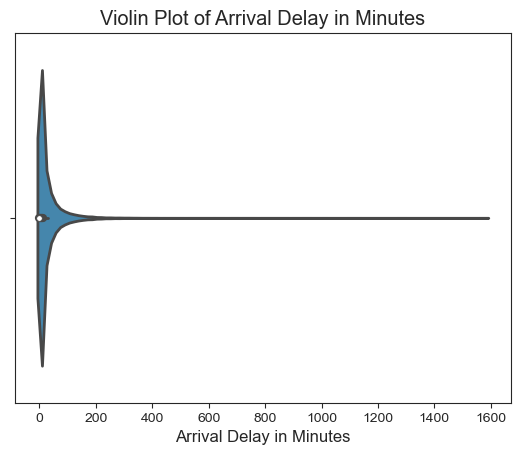

In [120]:
# Violin Plot for Arrival Delay in Minutes in the 'passenger_df' DataFrame
sns.violinplot(x='Arrival Delay in Minutes', data=passenger_df)
plt.title('Violin Plot of Arrival Delay in Minutes')  # Setting the plot title
plt.xlabel('Arrival Delay in Minutes')  # Labeling the x-axis
plt.show()  # Displaying the plot


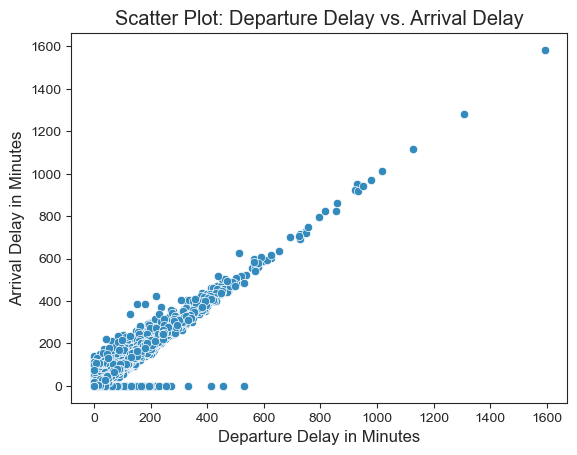

In [122]:
# Scatter plot for Departure Delay in Minutes vs. Arrival Delay in Minutes in the 'passenger_df' DataFrame
sns.scatterplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', data=passenger_df)
plt.title('Scatter Plot: Departure Delay vs. Arrival Delay')  # Setting the plot title
plt.xlabel('Departure Delay in Minutes')  # Labeling the x-axis
plt.ylabel('Arrival Delay in Minutes')  # Labeling the y-axis
plt.show()  # Displaying the plot


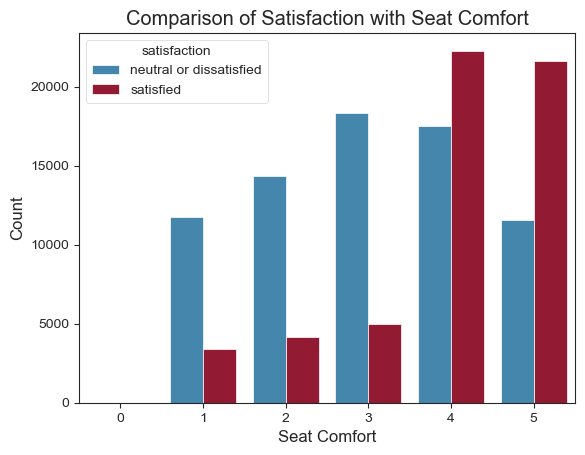

In [123]:
# Bar plot for the comparison between Satisfaction and Seat Comfort in the 'passenger_df' DataFrame
sns.countplot(x='Seat comfort', hue='satisfaction', data=passenger_df)
plt.title('Comparison of Satisfaction with Seat Comfort')  # Setting the plot title
plt.xlabel('Seat Comfort')  # Labeling the x-axis
plt.ylabel('Count')  # Labeling the y-axis
plt.show()  # Displaying the plot

# Observation: People experiencing higher seat comfort tend to have a higher level of satisfaction.


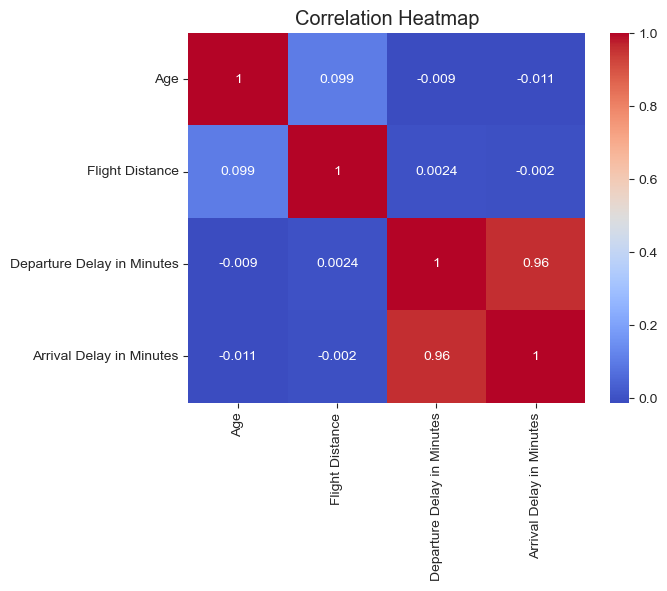

In [124]:
# Correlation Heatmap for selected numerical columns in the 'passenger_df' DataFrame
correlation_matrix = passenger_df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')  # Setting the plot title
plt.show()  # Displaying the plot


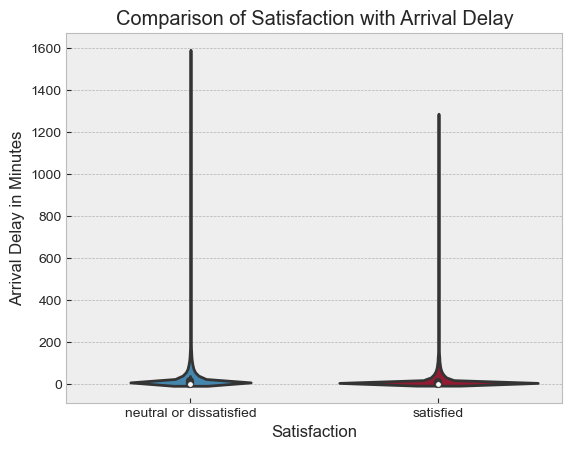

In [96]:
# Comparison of Satisfaction with Arrival Delay in the 'passenger_df' DataFrame
sns.violinplot(x='satisfaction', y='Arrival Delay in Minutes', data=passenger_df)
plt.title('Comparison of Satisfaction with Arrival Delay')  # Setting the plot title
plt.xlabel('Satisfaction')  # Labeling the x-axis
plt.ylabel('Arrival Delay in Minutes')  # Labeling the y-axis
plt.show()

# Observation: People tend to be more satisfied with minor delays, while massive delays lead to dissatisfaction.


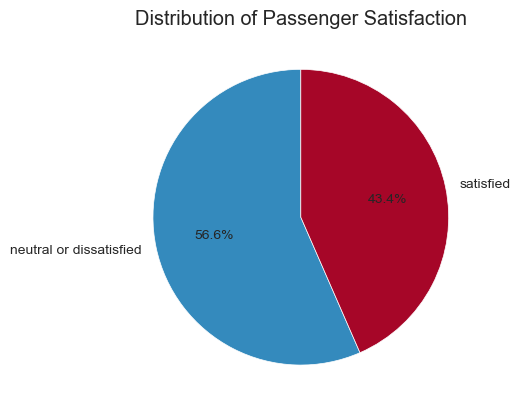

In [125]:
# Pie Chart for the distribution of passenger satisfaction in the 'passenger_df' DataFrame
satisfaction_counts = passenger_df['satisfaction'].value_counts()
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Passenger Satisfaction')  # Setting the plot title
plt.show()  # Displaying the plot


In [ ]:
#Similarly data visualization for airline dataset

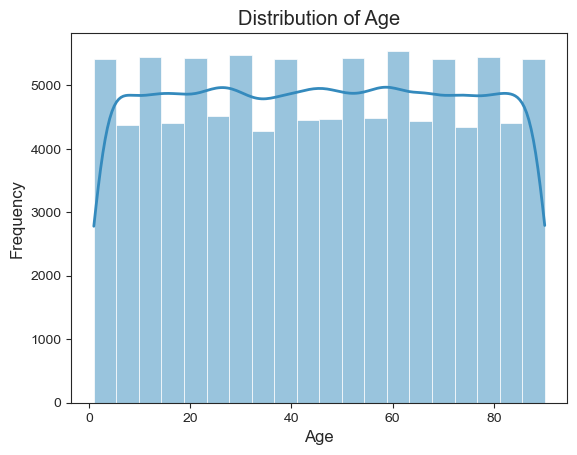

In [126]:
# Histogram for the distribution of age in the 'flight_df' DataFrame
sns.histplot(flight_df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')  # Setting the plot title
plt.xlabel('Age')  # Labeling the x-axis
plt.ylabel('Frequency')  # Labeling the y-axis
plt.show()  # Displaying the plot


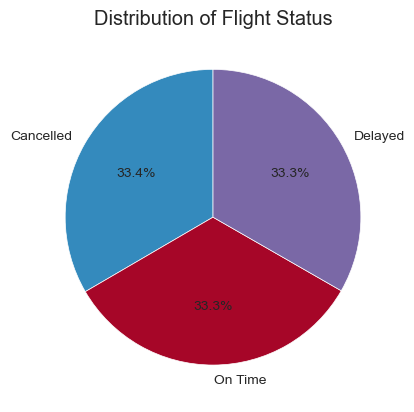

In [127]:
# Pie Chart for the distribution of flight status in the 'flight_df' DataFrame
flight_status_counts = flight_df['Flight Status'].value_counts()
plt.pie(flight_status_counts, labels=flight_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Flight Status')  # Setting the plot title
plt.show()  # Displaying the plot


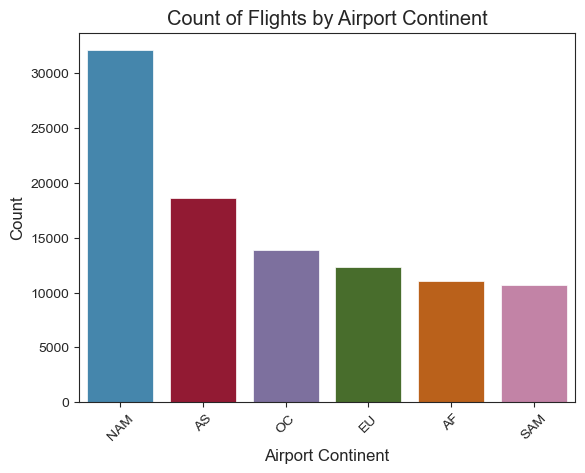

In [128]:
# Countplot for the distribution of flights by airport continent in the 'flight_df' DataFrame
sns.countplot(x='Airport Continent', data=flight_df, order=flight_df['Airport Continent'].value_counts().index)
plt.title('Count of Flights by Airport Continent')  # Setting the plot title
plt.xlabel('Airport Continent')  # Labeling the x-axis
plt.ylabel('Count')  # Labeling the y-axis
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()  # Displaying the plot


In [130]:
# Label encoding for 'Seat comfort' variable
label_encoder = LabelEncoder()
passenger_df['Seat comfort'] = label_encoder.fit_transform(passenger_df['Seat comfort'])

# Features and target variable
X = passenger_df[['Age', 'Flight Distance', 'Inflight wifi service']]
y = passenger_df['Seat comfort']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Development - Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_model.fit(X_train_scaled, y_train)

# Model Evaluation - Neural Network
y_pred_nn = nn_model.predict(X_test_scaled)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f'Neural Network Model Accuracy: {accuracy_nn}')
print(f'Classification Report (Neural Network):\n{classification_report(y_test, y_pred_nn)}')

# Model Development - Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Model Evaluation - Decision Tree
y_pred_dt = dt_model.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Model Accuracy: {accuracy_dt}')
print(f'Classification Report (Decision Tree):\n{classification_report(y_test, y_pred_dt)}')

# Model Development - Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Model Evaluation - Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Model Accuracy: {accuracy_rf}')
print(f'Classification Report (Random Forest):\n{classification_report(y_test, y_pred_rf)}')


Neural Network Model Accuracy: 0.32749461040960887
Classification Report (Neural Network):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      3033
           2       0.00      0.00      0.00      3649
           3       0.27      0.25      0.26      4642
           4       0.32      0.76      0.46      7998
           5       0.43      0.19      0.26      6654

    accuracy                           0.33     25976
   macro avg       0.21      0.24      0.20     25976
weighted avg       0.26      0.33      0.25     25976



C:\Users\NISHED PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NISHED PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NISHED PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Model Accuracy: 0.2738296889436403
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.14      0.09      0.11      3033
           2       0.19      0.17      0.18      3649
           3       0.22      0.23      0.23      4642
           4       0.34      0.43      0.38      7998
           5       0.31      0.25      0.28      6654

    accuracy                           0.27     25976
   macro avg       0.24      0.24      0.23     25976
weighted avg       0.26      0.27      0.27     25976

Random Forest Model Accuracy: 0.2810671388974438
Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.14      0.06      0.09      3033
           2       0.20      0.14      0.17      3649
           3       0.22      0.21      0.22      4642
           4       0.33      0.44      0.38      7998
           5       0.30      0.31      0.30      6654

    accur

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model
nn_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'max_iter': [500, 1000],
    'alpha': [0.0001, 0.001, 0.01],
}

dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform Grid Search for each model
nn_grid_search = GridSearchCV(MLPClassifier(random_state=42), nn_param_grid, cv=3, n_jobs=-1)
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=3, n_jobs=-1)
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, n_jobs=-1)

# Fit the models with Grid Search
nn_grid_search.fit(X_train_scaled, y_train)
dt_grid_search.fit(X_train_scaled, y_train)
rf_grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters for each model
print("Best Hyperparameters for Neural Network:", nn_grid_search.best_params_)
print("Best Hyperparameters for Decision Tree:", dt_grid_search.best_params_)
print("Best Hyperparameters for Random Forest:", rf_grid_search.best_params_)

# Evaluate the models with the best hyperparameters
best_nn_model = nn_grid_search.best_estimator_
best_dt_model = dt_grid_search.best_estimator_
best_rf_model = rf_grid_search.best_estimator_

# Model Evaluation - Neural Network
y_pred_nn = best_nn_model.predict(X_test_scaled)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f'Neural Network Model Accuracy: {accuracy_nn}')
print(f'Classification Report (Neural Network):\n{classification_report(y_test, y_pred_nn)}')

# Model Evaluation - Decision Tree
y_pred_dt = best_dt_model.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Model Accuracy: {accuracy_dt}')
print(f'Classification Report (Decision Tree):\n{classification_report(y_test, y_pred_dt)}')

# Model Evaluation - Random Forest
y_pred_rf = best_rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Model Accuracy: {accuracy_rf}')
print(f'Classification Report (Random Forest):\n{classification_report(y_test, y_pred_rf)}')


C:\Users\NISHED PC\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
exception calling callback for <Future at 0x1fe49cb6710 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\NISHED PC\anaconda3\Lib\site-packages\joblib\externals\loky\_base.py", line 26, in _invoke_callbacks
    callback(self)
  File "C:\Users\NISHED PC\anaconda3\Lib\site-packages\joblib\parallel.py", line 385, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\NISHED PC\anaconda3\Lib\site-packages\joblib\parallel.py", line 834, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\NISHED PC\anaconda3\Lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\NISHED PC\anaconda3\Li